# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Linear Regression with Statsmodels and Scikit-Learn
Week 3 | Lesson 1.2



### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Perform a linear regression in statsmodels
- Perform a linear regression in scikit-learn

Let's investigate the housing dataset with linear regression. We'll use two different packages and you can see examples for linear regression of each:
* statsmodels -- [linear regression](http://statsmodels.sourceforge.net/devel/examples/#regression)
* scikit-learn -- [linear regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

## Intro to Scikit-Learn

Scikit-learn is a machine learning package for python that includes a huge array of models including linear regression. Scikit-learn includes a number of sample datasets, including the Boston housing dataset you downloaded for the previous lab.

Note that you usually will not get a dataset in this format: because it is a prepackaged example, it has custom attributes like a description, predictor names, and pre-separated predictor and target columns.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
data = datasets.load_boston()

In [2]:
print data.DESCR # Here's an example of a data dictionary

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Data exploration

Let's take a minute to see what the data looks like.

In [3]:
# Typically these won't already be separated for you

print data.feature_names
print data.data[0]
print data.target[0]



['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
24.0


In [4]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Let's get a feel for the distribution of each variable.

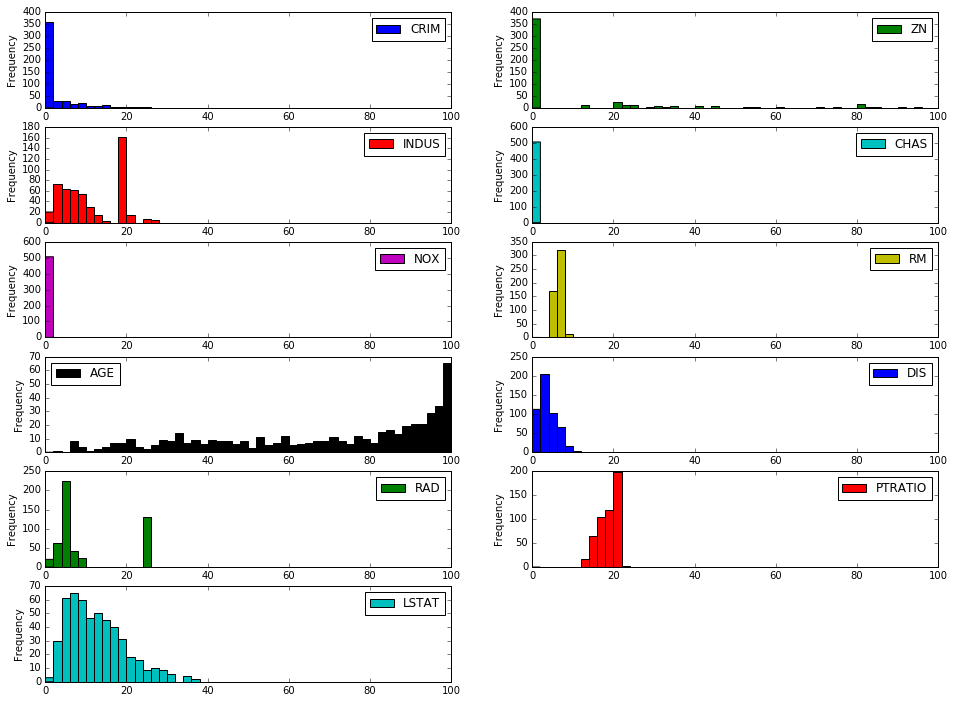

In [5]:
df.drop(['TAX','B'], axis=1).plot(kind='hist', subplots = True, layout = (6,2), \
                                  sharex = False, bins = 50, figsize = (16,12));

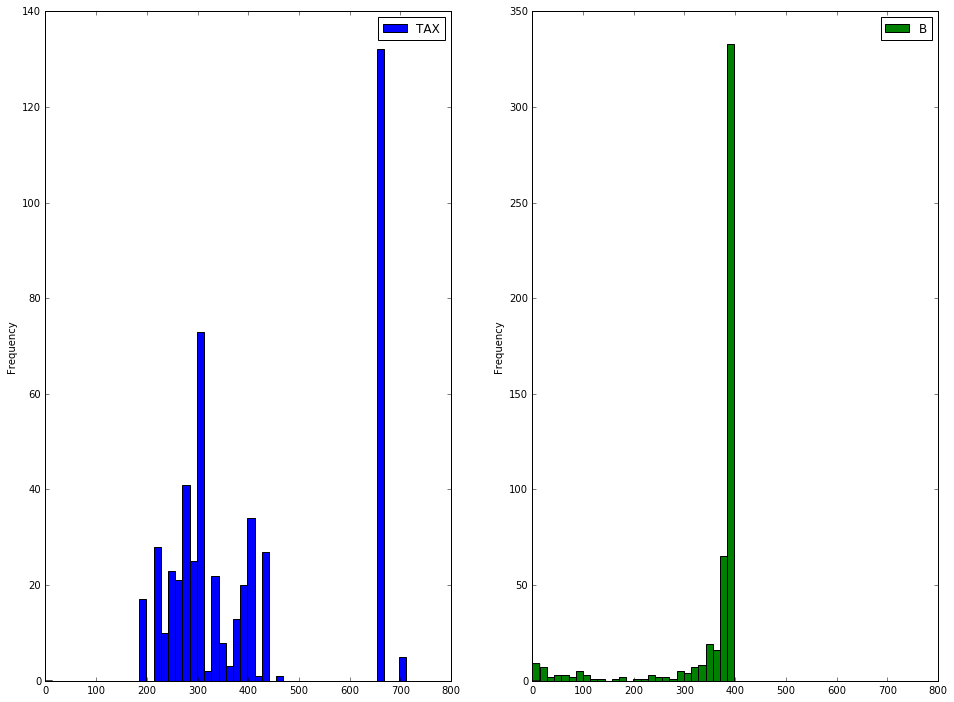

In [6]:
df[['TAX','B']].plot(kind='hist', subplots = True, layout = (1,2), sharex = False, bins = 50, figsize = (16,12));

Time to build a linear regression model! Let's start with scikit-learn.

First put the target variable data into a data frame for convenience, and do a quick check to see that everything loaded correctly.

In [7]:
# Put the target (housing value -- MEDV) in another DataFrame
targets = pd.DataFrame(data.target, columns=["MEDV"])

# Take a look at the first few rows
print df.head()
print "----"
print targets.head()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
----
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


There is a fair bit to play with. What a priori expectations do you have?

We can explore the data visually to find correlations.

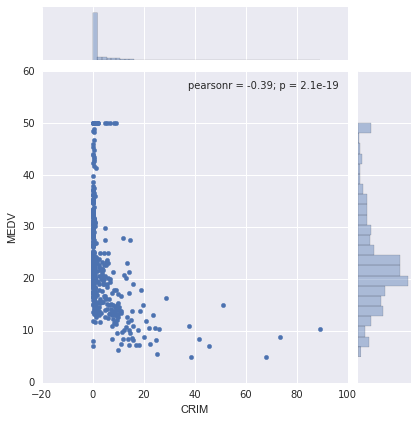

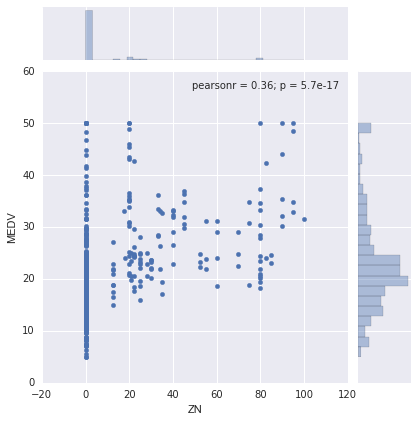

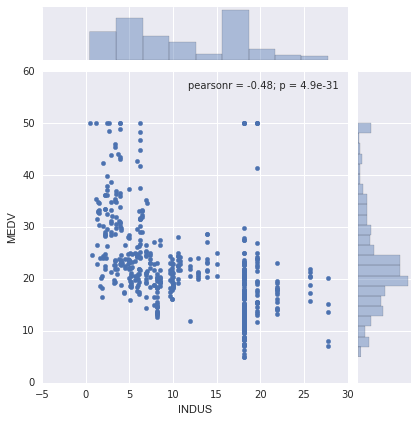

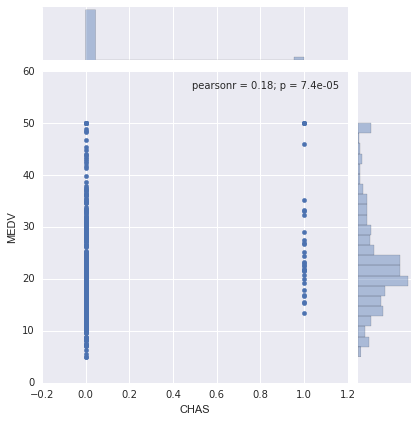

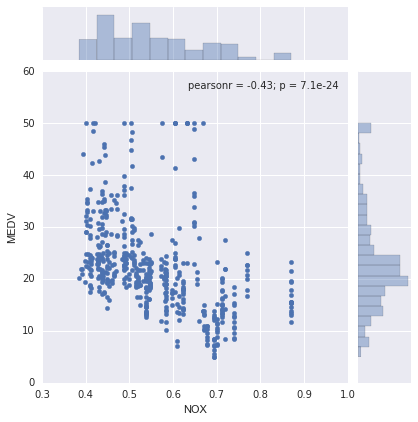

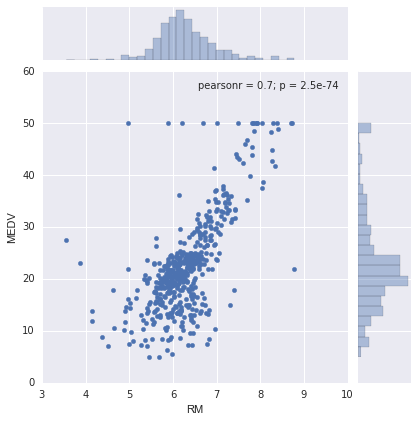

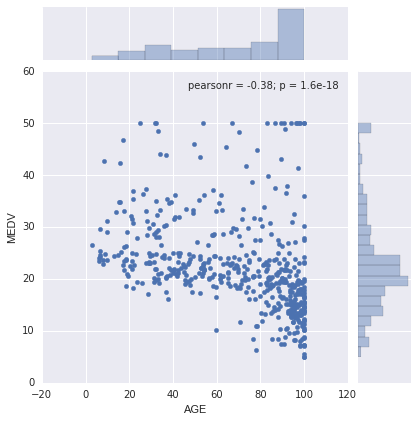

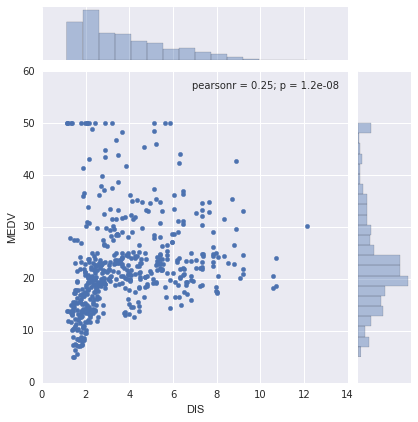

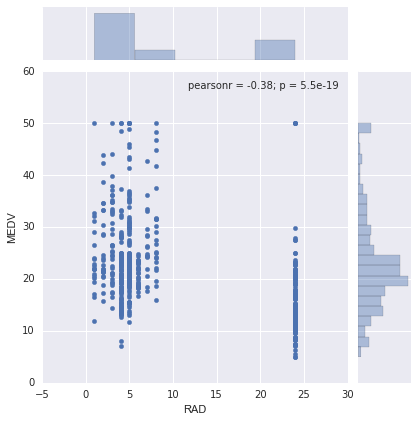

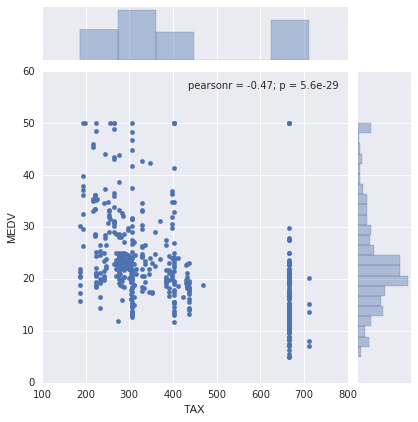

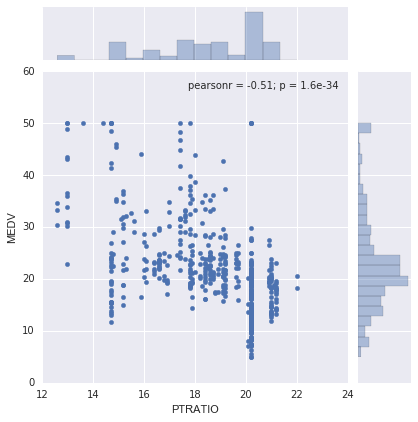

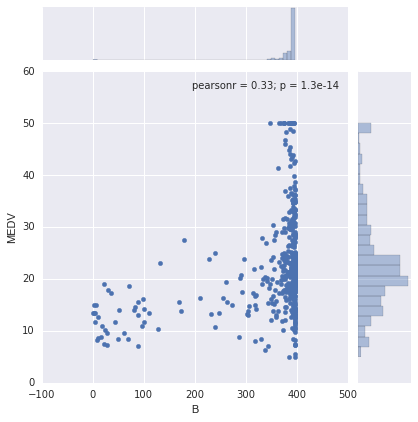

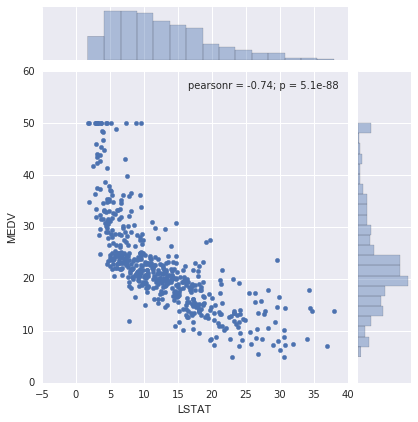

In [8]:
import seaborn as sns
for iv in df.columns.values:
    sns.jointplot(x=df[iv], y=targets["MEDV"])

# Fitting our 1st Model!

Now let's fit a linear model to the data, starting with two of the variables we identified visually as being linked to house value: RM and LSTAT. We can model each individually and then both together.

Note: If for some reason scikit-learn crashes the jupyter notebook, have conda remove mkl (there's an issue with the newer build on some systems).

In [9]:
lm = linear_model.LinearRegression()

X = df[["RM"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

That's it! We have our model.

In [10]:
print(df['RM'][:5]) # The first 5 predictor values.
print(targets['MEDV'][:5]) # The first 5 outcome values.
print(predictions[:5]) # Our first 5 predictions, based on fitting a linear model MEDV ~ RM.

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64
[ 25.17574577  23.77402099  30.72803225  29.02593787  30.38215211]


MSE: 43.6005517712


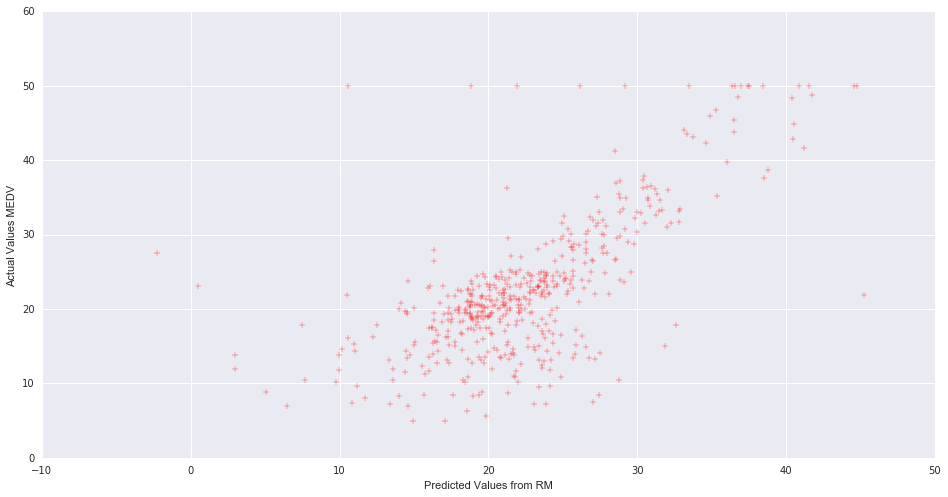

In [11]:
# How is it performing? Plot the model's predictions against actual values
# s = s: size in points, c = color, zorder = layer order

print "MSE:", mean_squared_error(y, predictions)
plt.figure(figsize=(16,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()


One way to diagnose model performance is to check the residuals.

What would you want the residuals to look like, given the usual assumptions for linear regression? If those residuals are poorly behaved, what could we consider?

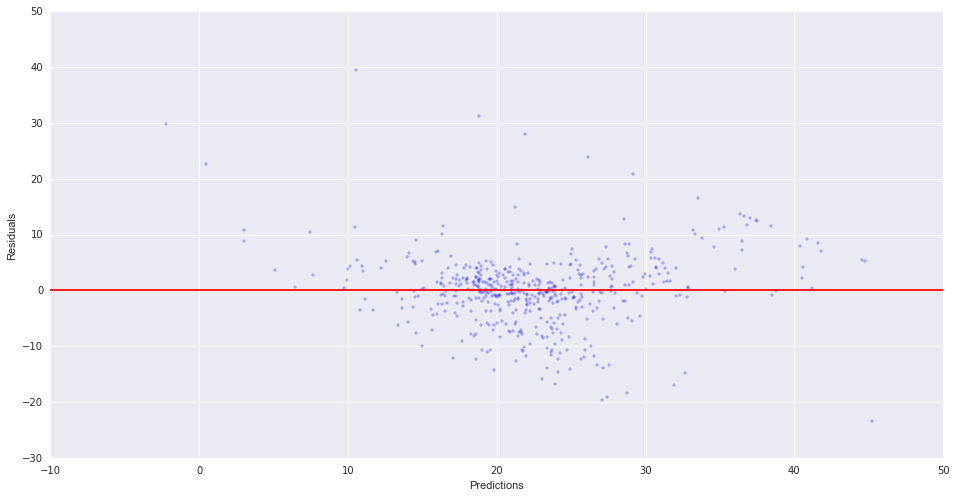

In [12]:
# Plot the residuals against y-hat. Do we have constant variance?
plt.figure(figsize=(16,8))
plt.scatter(predictions, y - predictions, c = 'b', marker = '+')
plt.axhline(0, color='r');
plt.xlabel("Predictions")
plt.ylabel("Residuals");

Now let's build a model where MEDV ~ LSTAT.

MSE: 38.4829672299


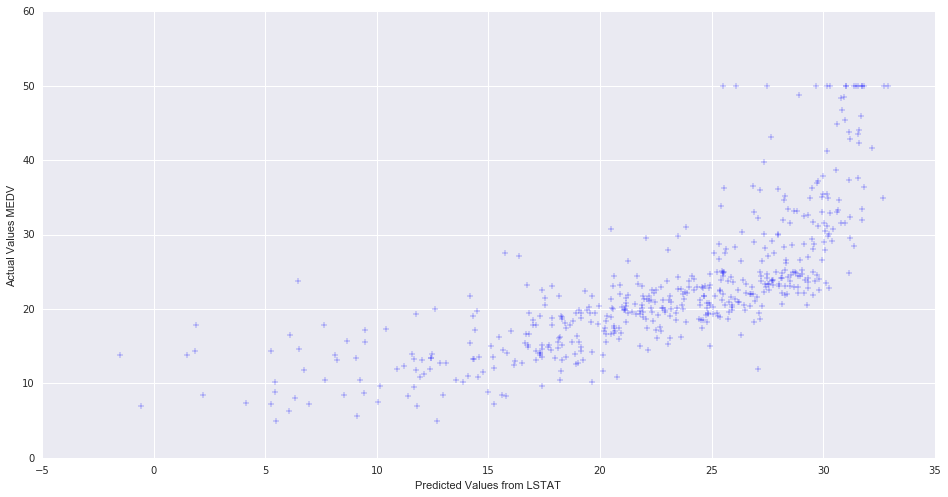

In [13]:
lm = linear_model.LinearRegression()
X = df[["LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
print "MSE:", mean_squared_error(y, predictions)
plt.figure(figsize=(16,8))
plt.scatter(predictions, y, s=30, c='b', marker='+', zorder=10)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()

Checking this model's residuals.

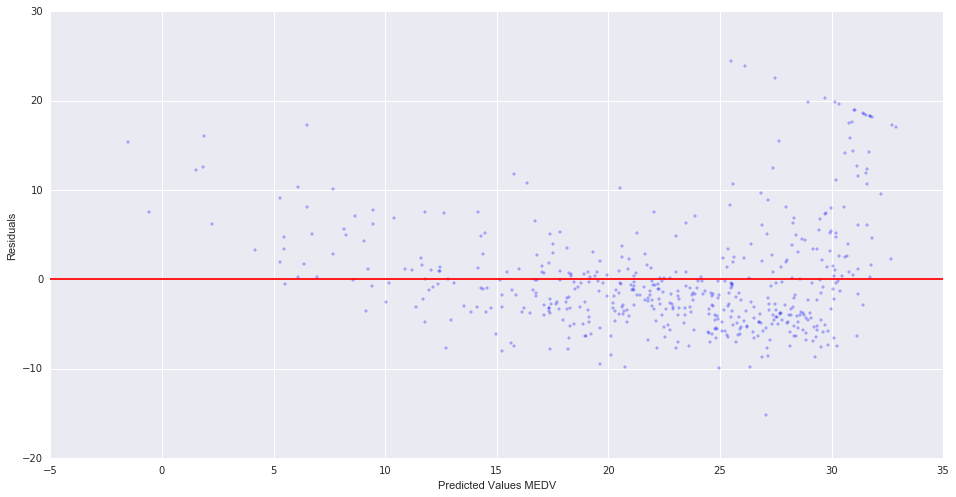

In [14]:
plt.figure(figsize=(16,8))
plt.scatter(predictions, y - predictions, c = 'b', marker = '+')
plt.xlabel("Predicted Values MEDV")
plt.ylabel("Residuals")
plt.axhline(0, color='r')
plt.show()

We can see a trend line in the residuals -- let's try transforming the predictor variable.

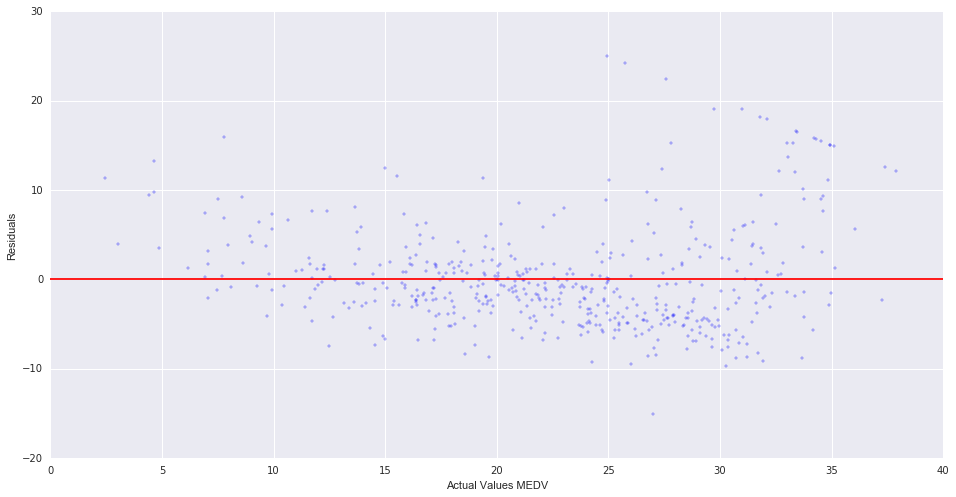

MSE: 32.3836468878


In [15]:
lm = linear_model.LinearRegression()

X = np.sqrt((df[["LSTAT"]])) # Create a new predictor that is the square root of LSTAT
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the new model's residuals
plt.figure(figsize=(16,8))
plt.xlabel("Actual Values MEDV")
plt.ylabel("Residuals")
plt.scatter(predictions, y - predictions, c = 'b', marker = '+')
plt.axhline(0, color='r')
plt.show()

plt.show()
print "MSE:", mean_squared_error(y, predictions)

Still some funny business. We'll visit this in another lesson this week.

Now, time for multilinear regression! The syntax is nicely extensible.

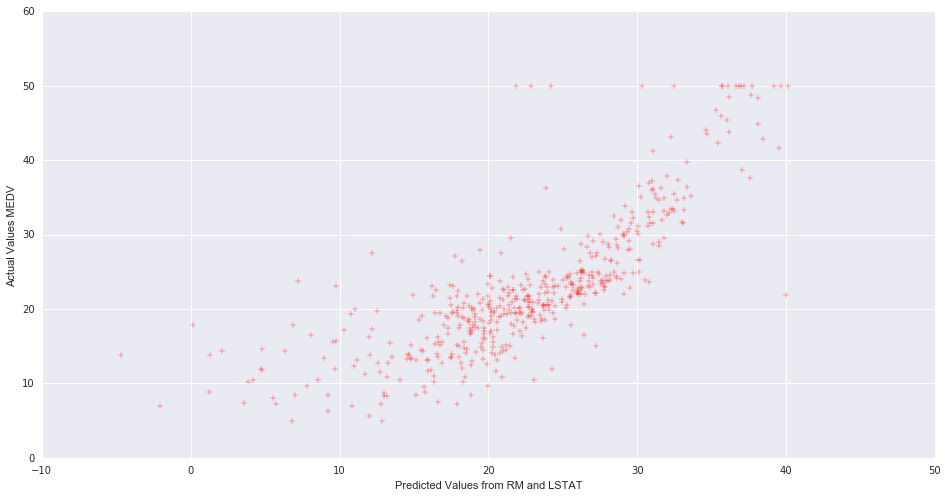

MSE: 30.5124687773


In [16]:
lm = linear_model.LinearRegression()

X = df[["RM", "LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.figure(figsize=(16,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=1)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Comparing the models

A perfect fit would yield a straight line when we plot the predicted values versus the true values. We'll quantify the goodness of fit soon.

### Exercise

Run the fit on all the variables with `X = df`. Did this improve the fit versus the previously tested variable combinations? (Use mean squared error).

In [17]:
#my solution
X = df
model = lm.fit(X,y)
predictions = model.predict(X)

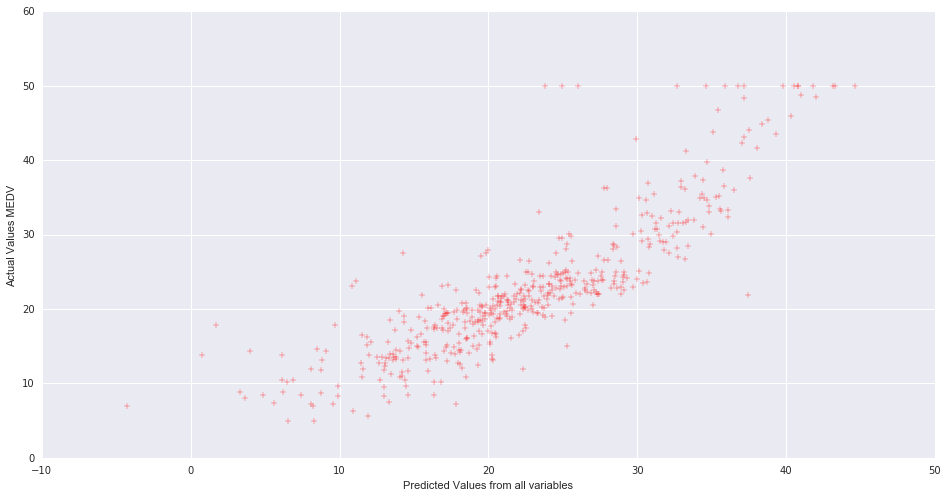

MSE: 21.8977792177


In [18]:
plt.figure(figsize=(16,8))
plt.scatter(predictions, y, s=30, c='r', marker='+')
plt.xlabel("Predicted Values from all variables")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

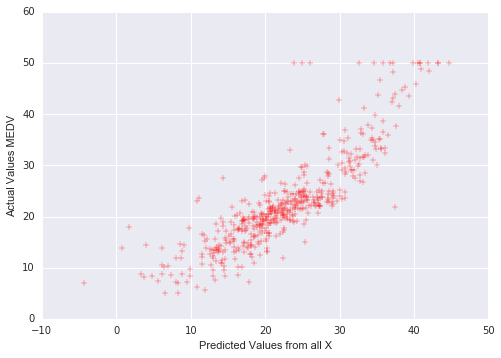

MSE: 21.8977792177


In [19]:
# Use the entire df of predictors as X

X = df
model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from all X")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Intro to Statsmodels

Statsmodels is another popular package for regressions, as well as many other "traditional" statistical analyses.

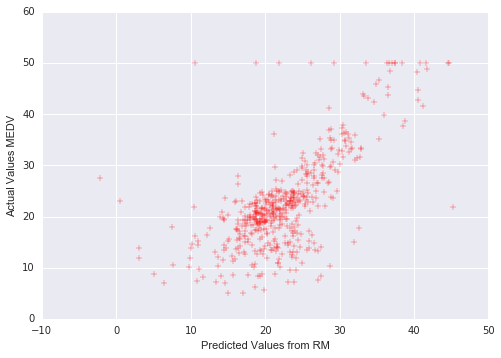

MSE: 43.6005517712


In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = df["RM"]
X = sm.add_constant(X) # Need an intercept, unlike sklearn not added automatically in parameters
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict()

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+')
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

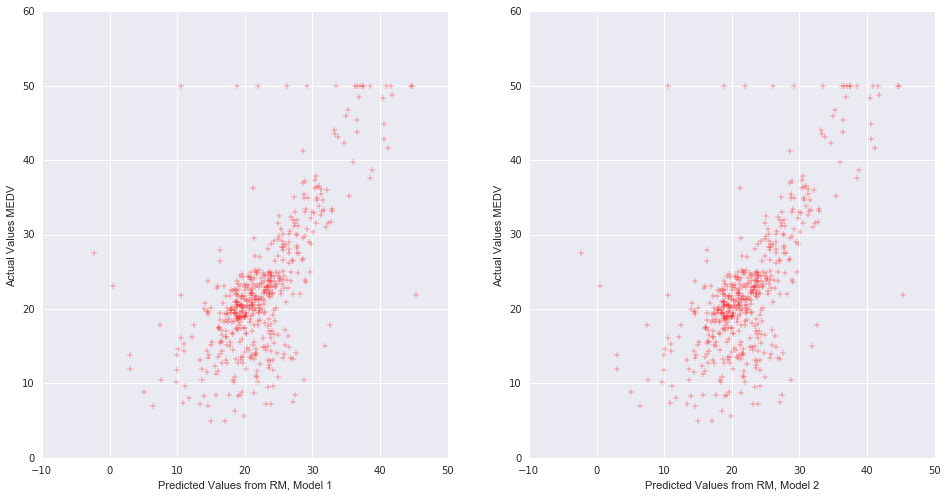

Model 1 MSE: 43.6005517712
Model 2 MSE: 43.6005517712


In [21]:
df2 = pd.concat([df, targets], axis = 1)
model2 = smf.ols(formula = 'MEDV ~ RM', data = df2).fit() # This formula style automatically adds an intercept
predictions2 = model2.predict()


fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
# Plot the models side-by-side
plt.scatter(predictions, y, s=30, c='r', marker='+')
plt.xlabel("Predicted Values from RM, Model 1")
plt.ylabel("Actual Values MEDV")

ax2 = fig.add_subplot(122)
plt.scatter(predictions2, y, s=30, c='r', marker='+')
plt.xlabel("Predicted Values from RM, Model 2")
plt.ylabel("Actual Values MEDV")


plt.show()
print "Model 1 MSE:", mean_squared_error(y, predictions)
print "Model 2 MSE:", mean_squared_error(y, predictions2)

statsmodels has a great Matlab/R-style summary method for its models.

In [22]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 03 Oct 2016   Prob (F-statistic):           2.49e-74
Time:                        15:14:51   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

## Guided Practice

Compare this to the analogous fit from scikit-learn above.

### Exercises

Recreate the model above with `statsmodels`:
* a model using LSTAT
* a model using RM and LSTAT
* a model using all the variables

Compare the mean squared errors for each model between the two packages. Do they differ significantly? Why or why not?

In [23]:
# Start your exercises here

X = df[['LSTAT']]
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict()
print "MSE for 'MEDV ~ LSTAT':{}".format(mean_squared_error(predictions, y))

model2 = smf.ols(formula='MEDV ~ LSTAT + RM', data=df2).fit()
p2 = model2.predict()
print "MSE for 'MEDV ~ LSTAT + RM':{}".format(mean_squared_error(p2, y))

X = df
X = sm.add_constant(X)
m3 = sm.OLS(y,X).fit()
p3 = m3.predict()
print "MSE for 'MEDV ~ .':{}".format(mean_squared_error(p3, y))

all_columns = '+'.join(df.columns) 
m4 = smf.ols(formula='MEDV ~ '+all_columns, data=df2).fit()
p4 = m4.predict()
print "MSE for 'MEDV ~ .':{}".format(mean_squared_error(p4, y))


MSE for 'MEDV ~ LSTAT':38.4829672299
MSE for 'MEDV ~ LSTAT + RM':30.5124687773
MSE for 'MEDV ~ .':21.8977792177
MSE for 'MEDV ~ .':21.8977792177


In [24]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 03 Oct 2016   Prob (F-statistic):          6.95e-135
Time:                        15:14:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 03 Oct 2016   Prob (F-statistic):          6.95e-135
Time:                        15:14:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Independent Practice

Using your preference of `scikit-learn` or `statsmodels`, try to find the best models with:
* only two predictor variables
* only three variables
* only four variables

Evaluate your models using the squared error. Which has the lowest? How do the errors compare to using all the variables?

In [43]:
# Start your exercises here
def gen_model(col):
    X = df[col]
    model = lm.fit(X, y)
    predictions = model.predict(X)
    mse = mean_squared_error(predictions, y)
    #print "Using columns: {}, MSE: {}".format(col, mse)
    return mse

In [44]:
gen_model(['RM', 'LSTAT'])

30.512468777299471

In [45]:
col_names = df.columns.values.tolist()

In [70]:
two_p = {}
for i in range(len(col_names)):
    for j in range(i,len(col_names)):
        predictors = [col_names[i], col_names[j]]
        name = ' '.join(predictors)
        two_p[name] = gen_model(predictors)

# to find the triplet with the smallest MSE
for k, v in two_p.items():
    if v == np.min(two_p.values()):
        print k, v

RM LSTAT 30.5124687773


In [69]:
three_p = {}
for i in range(len(col_names)):
    for j in range(i,len(col_names)):
        for k in range(j,len(col_names)):
            predictors = [col_names[i], col_names[j], col_names[k]]
            name = ' '.join(predictors)
            three_p[name] = gen_model(predictors)

# to find the triplet with the smallest MSE
for k, v in three_p.items():
    if v == np.min(three_p.values()):
        print k, v

RM PTRATIO LSTAT 27.1304057585


In [68]:
four_p = {}
for i in range(len(col_names)):
    for j in range(i,len(col_names)):
        for k in range(j,len(col_names)):
            for m in range(k,len(col_names)):
                predictors = [col_names[i], col_names[j], col_names[k], col_names[m]]
                name = ' '.join(predictors)
                four_p[name] = gen_model(predictors)

# to find the quad with the smallest MSE
for k, v in four_p.items():
    if v == np.min(four_p.values()):
        print k, v

RM DIS PTRATIO LSTAT 26.1440863688


- As the number of predictors increase, the decrease in MSE decreases
- The best two predictors remained in the best three which remained in the best four